In [4]:
from Net import Net
import torch
import torch.nn as nn
from AuxiliaryFunctions import save_checkpoint, save_recon, fig_to_img
from VideoDataset import VideoDataset
from VideoTransforms import *
from torch.utils.data import DataLoader
from torchvision import transforms
from timeit import default_timer as timer
from datetime import datetime
import matplotlib.pyplot as plt

In [20]:
def train(model,loader,device, num_epochs,directory, batch_size=4, learning_rate=1e-3,model_name='model',checkpoint=[]):
    torch.manual_seed(42)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(),lr=1e-3, weight_decay=1e-5)
    start_idx = 0
    if isinstance(checkpoint,dict):
        model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        start_idx = checkpoint['epoch']
    for epoch in range(start_idx,num_epochs):
        running_loss = 0.0
        for i, data in enumerate(loader, 0):
            optimizer.zero_grad()
            clips = data['clip'].to(device)
            reconstruction = model(clips)
            loss = criterion(clips,reconstruction)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()*clips.size(0)
            if i % 100 == 0:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, loss.item()))
        
        save_checkpoint(model,optimizer,epoch,running_loss,directory=directory,name=model_name)
        print(running_loss)
        save_recon(reconstruction,model_name,epoch,dir)
    return running_loss


In [3]:
directory='G:\My Drive\PhD\cut_swim_samples'#'/Volumes/GoogleDrive/My Drive/PhD/cut_swim_samples'
ds=VideoDataset(directory,num_frames=20, 
                transform=transforms.Compose([Rescale(256),ToTensor()]),swim_sample=False)
dataloader = DataLoader(ds, batch_size=4,
                        shuffle=True, num_workers=4)
len(ds)

5445

In [4]:
batch = next(iter(dataloader))
batch['clip'].shape

In [9]:

path = 'G:\My Drive\PhD\Swim_samples\model_091120_20frms.pt'
checkpoint=torch.load(path)

In [19]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net(color_channels=1)
model.to(device)
start = timer()
run_loss=train(model,dataloader,device,num_epochs=150, directory='G:\My Drive\PhD\Swim_samples' ,
               model_name='model_091120_20frms',checkpoint=checkpoint)
end = timer()
print(f'elapsed training time {end-start} sec')

[147,     1] loss: 0.012
[147,   101] loss: 0.006
[147,   201] loss: 0.005
[147,   301] loss: 0.006
[147,   401] loss: 0.007
[147,   501] loss: 0.012
[147,   601] loss: 0.006
[147,   701] loss: 0.008
[147,   801] loss: 0.003
[147,   901] loss: 0.007
[147,  1001] loss: 0.006
[147,  1101] loss: 0.005
[147,  1201] loss: 0.005
[147,  1301] loss: 0.006


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/PhD/Swim_samples/model_091120_20frms_epoch146.pt'

In [14]:
device

device(type='cuda')

AttributeError: 'list' object has no attribute 'savefig'

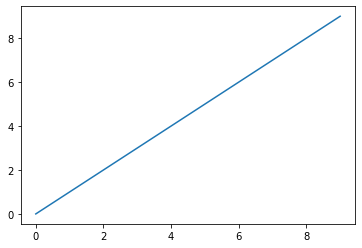

In [8]:
fig=plt.plot(range(10),range(10))
fig_to_img(fig)